# Análise de Componentes Principais (PCA)

Este notebook introduz a Análise de Componentes Principais (PCA), uma técnica fundamental em aprendizado de máquina e estatística para redução de dimensionalidade. O objetivo do PCA é transformar um conjunto de dados com variáveis possivelmente correlacionadas em um novo conjunto de variáveis linearmente não correlacionadas, chamadas de componentes principais.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

## Dataset Sintético

Para ilustrar os conceitos, geraremos um conjunto de dados bidimensional sintético com uma correlação linear clara entre as duas variáveis. Isso nos permitirá visualizar as métricas e os vetores calculados.

In [ ]:
np.random.seed(42)

# Gerar dados em torno de uma linha
X1 = np.random.rand(100) * 10
X2 = 2 * X1 + 3 + np.random.randn(100) * 2

# Combinar em uma única matriz de dados
X = np.vstack((X1, X2)).T

print("Dimensões do dataset sintético:", X.shape)

Dimensões do dataset sintético: (100, 2)


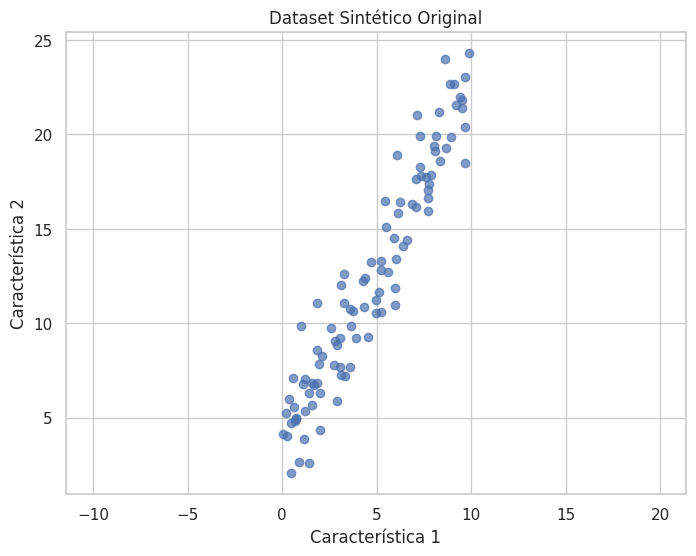

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title('Dataset Sintético Original')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.axis('equal')
plt.grid(True)
plt.show()

## Fundamentos

A PCA é fundamentada em conceitos da álgebra linear. A técnica busca encontrar um novo sistema de coordenadas, onde os eixos (os componentes principais) são as direções de maior variância nos dados.

### Covariância

A covariância é uma medida da relação linear entre duas variáveis aleatórias. Se as duas variáveis tendem a aumentar ou diminuir juntas, a covariância é positiva. Se uma variável tende a aumentar enquanto a outra diminui, a covariância é negativa. Se não há uma tendência linear, a covariância é próxima de zero.

Para duas variáveis $X$ e $Y$ com $m$ amostras, a covariância é calculada como:

$$
\text{cov}(X, Y) = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{m-1}
$$

Onde $\bar{x}$ e $\bar{y}$ são as médias de $X$ e $Y$, respectivamente.

### Matriz de Covariância

Para um conjunto de dados com $n$ características, a matriz de covariância, $\Sigma$, generaliza a covariância para múltiplas dimensões. É uma matriz quadrada $n \times n$ que contém as covariâncias entre cada par de características.

$$
\Sigma = \begin{pmatrix}
\text{cov}(X_1, X_1) & \text{cov}(X_1, X_2) & \cdots & \text{cov}(X_1, X_n) \\
\text{cov}(X_2, X_1) & \text{cov}(X_2, X_2) & \cdots & \text{cov}(X_2, X_n) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_n, X_1) & \text{cov}(X_n, X_2) & \cdots & \text{cov}(X_n, X_n)
\end{pmatrix}
$$

A diagonal desta matriz contém as variâncias de cada característica ($\text{cov}(X_j, X_j) = \text{var}(X_j)$), e os elementos fora da diagonal representam as covariâncias entre os pares de características. A matriz de covariância é simétrica, pois $\text{cov}(X_i, X_j) = \text{cov}(X_j, X_i)$.

In [ ]:
# 1. Centralizar os dados (subtrair a média)
mean = np.mean(X, axis=0)
X_centered = X - mean

# 2. Calcular a matriz de covariância
cov_matrix = np.cov(X_centered, rowvar=False)

print("Média das características:", mean)
print("\nMatriz de Covariância:")
print(cov_matrix)

Média das características: [ 4.70180743 12.40145415]

Matriz de Covariância:
[[ 8.84999497 16.88619178]
 [16.88619178 35.47854732]]


### Autovetores e Autovalores

Um passo importante do PCA é a decomposição da matriz de covariância em seus autovetores e autovalores. Esta decomposição nos revela as direções principais de variância nos dados.

Um autovetor de uma matriz é um vetor não nulo que, quando multiplicado pela matriz, resulta no mesmo vetor original, apenas escalonado por um fator $\lambda$, que é o autovalor correspondente. A relação é definida por:

$$
\Sigma v = \lambda v
$$

Onde $\Sigma$ é a matriz de covariância, $v$ é um autovetor e $\lambda$ é seu autovalor.

- **Autovetores**: Representam as direções dos eixos no novo espaço de características. No contexto do PCA, eles são os **componentes principais**. Eles são ortogonais entre si.
- **Autovalores**: Indicam a magnitude da variância dos dados ao longo das direções dos autovetores.

O primeiro componente principal é o autovetor associado ao maior autovalor, representando a direção de maior variância nos dados. O segundo componente principal é o autovetor com o segundo maior autovalor, e assim por diante.

In [ ]:
# Calcular autovetores e autovalores da matriz de covariância
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Autovalores:")
print(eigenvalues)
print("\nAutovetores (cada coluna é um autovetor):")
print(eigenvectors)

Autovalores:
[ 0.66047094 43.66807135]

Autovetores (cada coluna é um autovetor):
[[-0.89976642 -0.43637185]
 [ 0.43637185 -0.89976642]]


Autovetor 1: [-0.43637185 -0.89976642], Autovalor: 43.668071345185965
Autovetor 2: [-0.89976642  0.43637185], Autovalor: 0.6604709427066453


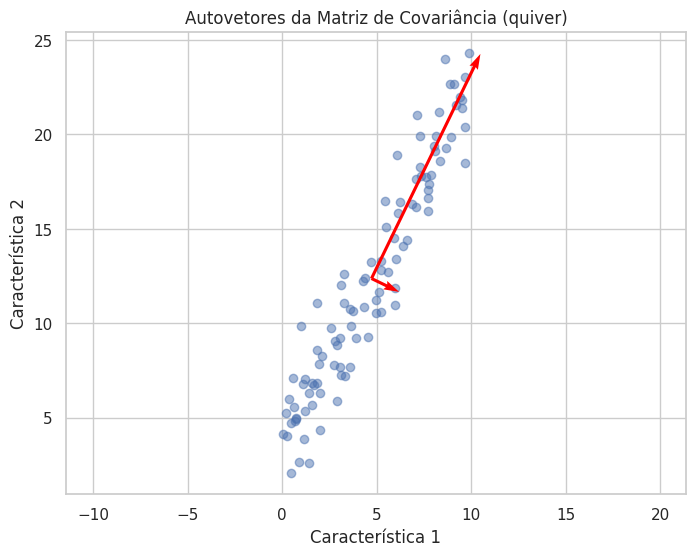

In [ ]:
# Ordenar autovetores pelos autovalores
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)

# Plotar os autovetores com quiver
for i in range(len(eigenvalues_sorted)):
    eigenvector = eigenvectors_sorted[:, i]
    eigenvalue = eigenvalues_sorted[i]
    vector_scaled = -eigenvector * np.sqrt(eigenvalue) * 2  # escala proporcional à variância
    plt.quiver(
        mean[0], mean[1],                # origem
        vector_scaled[0], vector_scaled[1],  # direção
        angles='xy', scale_units='xy', scale=1,
        color='red', width=0.005
    )
    print(f'Autovetor {i+1}: {eigenvector}, Autovalor: {eigenvalue}')

plt.xlim(X[:, 0].min() - 5, X[:, 0].max() + 5)
plt.ylim(X[:, 1].min() - 5, X[:, 1].max() + 5)
plt.title('Autovetores da Matriz de Covariância (quiver)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.axis('equal')
plt.grid(True)
plt.show()

## Implementação da Classe PCA

Com a compreensão dos conceitos fundamentais, agora podemos implementar o PCA utilizando NumPy. Nossa classe `PCA` seguirá uma estrutura similar à encontrada em bibliotecas como o Scikit-learn, contendo os métodos `fit`, `transform` e `fit_transform`. O método `fit` irá encapsular os passos que acabamos de realizar manualmente.

In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # 1. Centralizar os dados (subtrair a média)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # 2. Calcular a matriz de covariância
        # rowvar=False indica que as colunas são as variáveis
        cov_matrix = np.cov(X_centered, rowvar=False)

        # 3. Calcular autovetores e autovalores
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # 4. Ordenar autovetores pelos autovalores em ordem decrescente
        # Os autovetores são as colunas da matriz `eigenvectors`
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # 5. Armazenar os `n_components` primeiros autovetores
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # Centralizar os dados usando a média do treino
        X_centered = X - self.mean

        # Projetar os dados nos componentes
        # (n_samples, n_features) @ (n_features, n_components) -> (n_samples, n_components)
        X_projected = np.dot(X_centered, self.components.T)

        return X_projected

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

### Aplicando o PCA aos Dados

Agora, vamos instanciar nossa classe `PCA` e aplicá-la ao conjunto de dados sintético. Reduziremos a dimensionalidade de 2 para 1, retendo apenas o primeiro componente principal.

In [ ]:
# Instanciar e aplicar o PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

print("Dimensão dos dados originais:", X.shape)
print("Dimensão dos dados transformados:", X_pca.shape)

# Para reconstruir os dados (aproximadamente) a partir do espaço reduzido:
# X_reconstruido = np.dot(X_pca, pca.components) + pca.mean

Dimensão dos dados originais: (100, 2)
Dimensão dos dados transformados: (100, 1)


## Aplicação: Iris Dataset

Vamos agora aplicar nossa implementação de PCA em um cenário prático. O Iris dataset é um conjunto de dados clássico em machine learning, contendo 150 amostras de flores de íris, cada uma com 4 características (comprimento e largura da sépala e da pétala). O objetivo é classificar cada flor em uma das três espécies possíveis: Setosa, Versicolor e Virginica. Como os dados possuem 4 dimensões, não podemos visualizá-los diretamente. Usaremos o PCA para reduzir a dimensionalidade para 2, permitindo-nos plotar e inspecionar a separação das classes.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Carregando o dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("Dimensões originais do Iris dataset:", X_iris.shape)

Dimensões originais do Iris dataset: (150, 4)


### Padronização dos Dados

O PCA é sensível à escala das variáveis. Características com variâncias muito maiores que outras podem dominar os componentes principais, mesmo que não sejam necessariamente as mais informativas para a estrutura dos dados. Para mitigar esse efeito, é uma prática padrão e altamente recomendada padronizar os dados antes de aplicar o PCA. A padronização transforma os dados para que cada característica tenha média zero e desvio padrão unitário.

In [ ]:
# Padronizando as características
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# A média de cada coluna agora é próxima de 0
print("Média após padronização:", np.mean(X_iris_scaled, axis=0))
# O desvio padrão de cada coluna agora é próximo de 1
print("Desvio padrão após padronização:", np.std(X_iris_scaled, axis=0))

Média após padronização: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Desvio padrão após padronização: [1. 1. 1. 1.]


### Aplicando PCA para Redução de Dimensionalidade

Com os dados padronizados, podemos agora aplicar nossa classe `PCA`. Vamos reduzir as 4 dimensões originais para 2, que corresponderão aos dois primeiros componentes principais (aqueles com a maior variância).

In [ ]:
# Instanciar e aplicar o PCA para reduzir de 4 para 2 dimensões
pca_iris = PCA(n_components=2)
X_iris_pca = pca_iris.fit_transform(X_iris_scaled)

print("Dimensão dos dados após o PCA:", X_iris_pca.shape)

Dimensão dos dados após o PCA: (150, 2)


### Visualização dos Dados no Espaço dos Componentes Principais

Agora que os dados foram projetados em um espaço bidimensional, podemos criar um gráfico de dispersão. Cada ponto no gráfico representará uma flor, e sua posição será determinada pelos valores do primeiro e do segundo componente principal. Vamos colorir cada ponto de acordo com sua espécie original para verificar se os componentes principais conseguiram capturar uma estrutura que separa as classes.

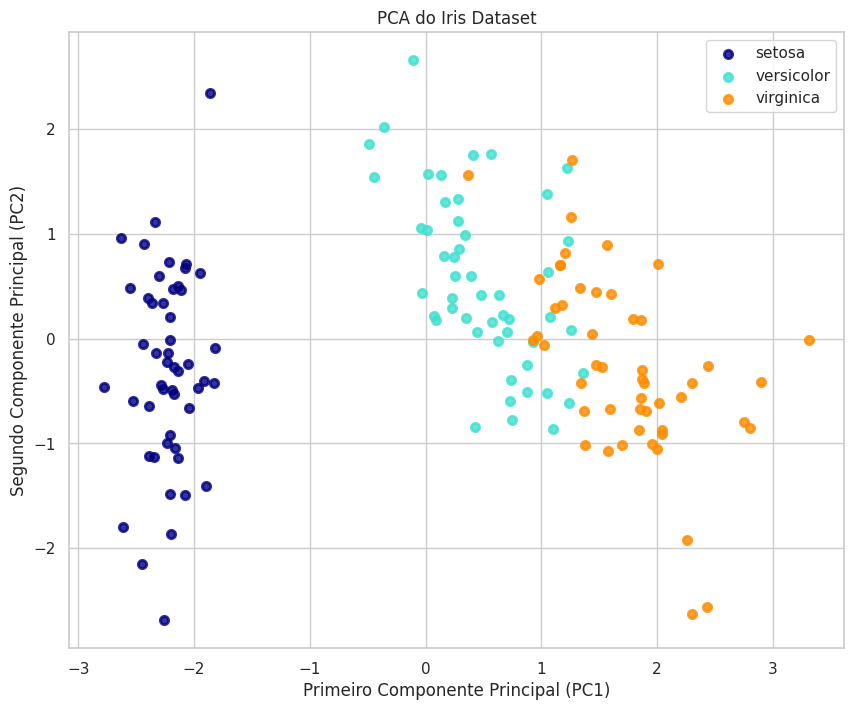

In [ ]:
plt.figure(figsize=(10, 8))
target_names = iris.target_names
colors = ['navy', 'turquoise', 'darkorange']

# Plotar cada classe separadamente para criar a legenda
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_iris_pca[y_iris == i, 0], X_iris_pca[y_iris == i, 1],
                color=color, alpha=.8, lw=2,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA do Iris Dataset')
plt.xlabel('Primeiro Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.grid(True)
plt.show()

## Aplicação: Eigenfaces com o LFW Dataset

Uma das aplicações mais famosas do PCA é no campo da visão computacional, especificamente para o reconhecimento facial. A técnica, conhecida como Eigenfaces, trata cada imagem de um rosto como um vetor em um espaço de alta dimensionalidade (onde cada pixel é uma dimensão). O PCA é então utilizado para encontrar um subespaço de dimensionalidade muito menor que captura as variações mais significativas entre os rostos no conjunto de dados. Os componentes principais deste subespaço, quando visualizados como imagens, são chamados de "Eigenfaces". Eles representam os "ingredientes" fundamentais a partir dos quais todos os rostos do dataset podem ser construídos.

### Carregando o Dataset de Rostos

Usaremos o dataset "Labeled Faces in the Wild" (LFW), que está convenientemente disponível na biblioteca Scikit-learn. Para tornar o processamento computacionalmente viável para este notebook, vamos carregar um subconjunto pré-processado do dataset, selecionando apenas indivíduos para os quais existem pelo menos 70 fotos.

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

# Carregar o dataset
# min_faces_per_person: Filtra para pessoas com um número mínimo de fotos
# resize: Garante que todas as imagens tenham o mesmo tamanho
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Inspecionar as dimensões dos dados
n_samples, h, w = lfw_people.images.shape
X_faces = lfw_people.data
n_features = X_faces.shape[1]
y_faces = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Número total de amostras:", n_samples)
print("Número de características (pixels):", n_features)
print("Número de classes (pessoas):", n_classes)
print("Dimensões de cada imagem: {} x {}".format(h, w))

Número total de amostras: 1288
Número de características (pixels): 1850
Número de classes (pessoas): 7
Dimensões de cada imagem: 50 x 37


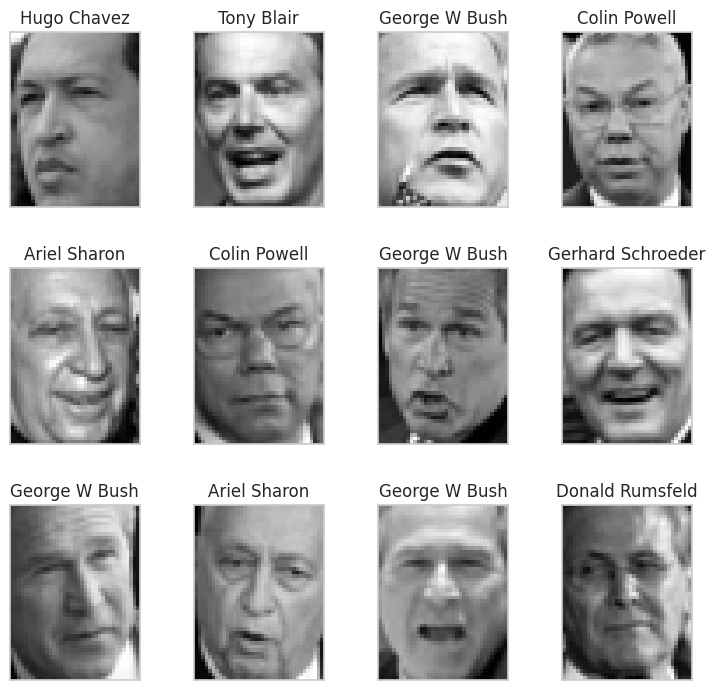

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Plotar a primeira galeria
sample_titles = [target_names[y_faces[i]] for i in range(12)]
plot_gallery(X_faces, sample_titles, h, w)

### Dividindo os Dados e Aplicando o PCA

Vamos dividir os dados em conjuntos de treino e teste. O PCA será "treinado" (ajustado) apenas no conjunto de treino para encontrar os componentes principais (as eigenfaces). O conjunto de teste será usado para avaliar a capacidade do modelo de representar rostos que não foram vistos durante o treinamento.

Vamos escolher reter 150 componentes principais, o que representa uma redução de dimensionalidade significativa em relação aos 1850 pixels originais.

In [ ]:
# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_faces, y_faces, test_size=0.25, random_state=42)

# Instanciar e aplicar o PCA
n_components = 150
pca_faces = PCA(n_components=n_components)
pca_faces.fit(X_train)


print(f"x_faces: {X_faces.shape}")
print(f"y_faces: {y_faces.shape}")
print(f"x_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {X_test.shape}")
print(f"y_test: {y_test.shape} \n")

print(f"PCA ajustado. {n_components} componentes principais foram extraídos de {n_features} características.")

x_faces: (1288, 1850)
y_faces: (1288,)
x_train: (966, 1850)
y_train: (966,)
x_test: (322, 1850)
y_test: (322,) 

PCA ajustado. 150 componentes principais foram extraídos de 1850 características.


### Visualizando as Eigenfaces

As eigenfaces são simplesmente os componentes principais remodelados para as dimensões originais da imagem. Elas parecem rostos fantasmagóricos e representam as direções de maior variância nos dados. A primeira eigenface captura a variação mais proeminente (geralmente relacionada à iluminação), a segunda captura a próxima maior variação, e assim por diante.

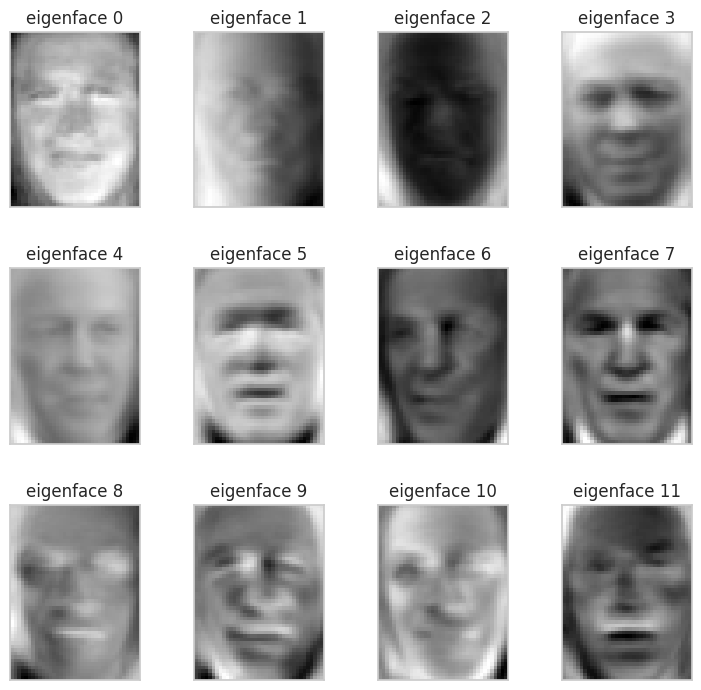

In [ ]:
# As eigenfaces são os componentes armazenados no objeto PCA
eigenfaces = pca_faces.components.real.reshape((n_components, h, w))

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

### Reconstrução de Rostos a Partir das Eigenfaces

A beleza do PCA é que podemos usar os componentes para reconstruir uma aproximação do rosto original. O processo envolve duas etapas:

1.  **Projeção (`transform`)**: O rosto original é projetado no subespaço de baixa dimensão, resultando em um vetor de `n_components` pesos. Cada peso indica a "importância" de cada eigenface na composição daquele rosto específico.
2.  **Reconstrução (Transformação Inversa)**: O rosto aproximado é reconstruído realizando uma combinação linear das eigenfaces, ponderada pelos pesos obtidos na etapa anterior, e adicionando de volta o rosto médio que foi subtraído no início do processo.

In [ ]:
# Projetar os dados de teste no subespaço das eigenfaces
X_test_pca = pca_faces.transform(X_test)

# Reconstruir as imagens a partir da representação de baixa dimensão
# Reconstrução = (Projeção @ Componentes) + Média
X_test_reconstructed = np.dot(X_test_pca, pca_faces.components) + pca_faces.mean

### Comparando Rostos Originais e Reconstruídos

Agora, vamos visualizar alguns rostos do conjunto de teste, lado a lado com suas reconstruções. Isso nos permite avaliar qualitativamente quanta informação foi preservada após a compressão para 150 dimensões.

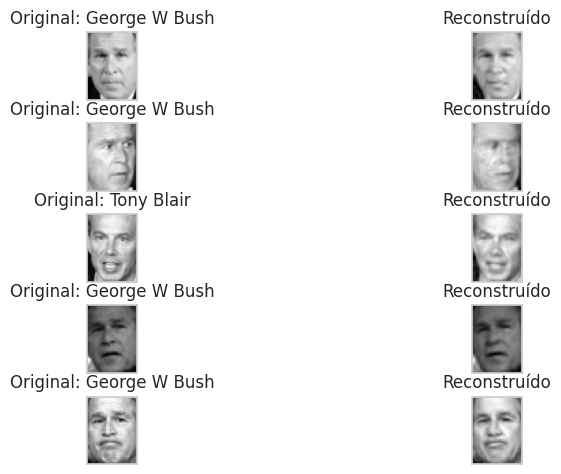

In [ ]:
def plot_reconstructions(original, reconstructed, titles, h, w):
    n_images = len(original)
    plt.figure(figsize=(1.8 * 4, 2.4 * (n_images // 2)))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

    for i in range(n_images):
        # Plot Original
        plt.subplot(n_images, 2, 2*i + 1)
        plt.imshow(original[i].real.reshape((h, w)), cmap=plt.cm.gray)
        plt.title("Original: " + titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

        # Plot Reconstruído
        plt.subplot(n_images, 2, 2*i + 2)
        plt.imshow(reconstructed[i].real.reshape((h, w)), cmap=plt.cm.gray)
        plt.title("Reconstruído", size=12)
        plt.xticks(())
        plt.yticks(())

# Selecionar 5 imagens de teste para visualização
n_comparisons = 5
test_titles = [target_names[y_test[i]] for i in range(n_comparisons)]
plot_reconstructions(X_test[:n_comparisons], X_test_reconstructed[:n_comparisons], test_titles, h, w)

## Exercícios

### Exercício 1: Classificação de Vinhos com PCA

O dataset "Wine", disponível em `sklearn.datasets`, contém os resultados de uma análise química de vinhos cultivados na mesma região na Itália, mas derivados de três cultivares (classes) diferentes. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos. Sua tarefa é usar o PCA para visualização. Carregue o dataset, padronize as 13 características e, em seguida, aplique o PCA para reduzir a dimensionalidade para 2 componentes. Por fim, crie um gráfico de dispersão dos dados projetados, colorindo cada ponto de acordo com sua classe de vinho original, e observe a eficácia do PCA em separar os diferentes cultivares no espaço bidimensional.

In [ ]:
# 1. Carregar o dataset wine
from sklearn.datasets import load_wine

wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print("Dataset Wine:")
print(f"Shape: {X_wine.shape}")
print(f"Features: {wine.feature_names}")
print(f"Classes: {wine.target_names}")

Dataset Wine:
Shape: (178, 13)
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']


In [ ]:
# 2. Padronização das características
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

In [ ]:
# 3. PCA: Redução da dimensionalidade (13->2)
n_components = 2
pca_wine = PCA(n_components=n_components)
X_wine_pca = pca_wine.fit_transform(X_wine_scaled)

print(f"PCA ajustado. {n_components} componentes principais foram extraídos de {X_wine.shape[1]} características.")

PCA ajustado. 2 componentes principais foram extraídos de 13 características.


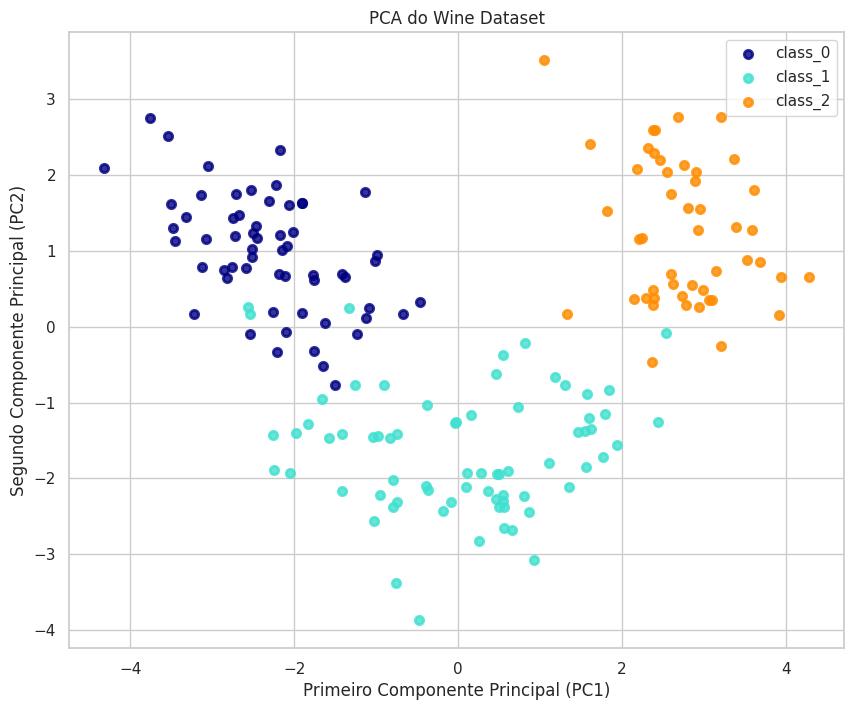

In [ ]:
# 4. Visualização dos dados (gráfico de dispersão)
plt.figure(figsize=(10, 8))
target_names = wine.target_names
colors = ['navy', 'turquoise', 'darkorange']

# Plotar cada classe separadamente para criar a legenda
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_wine_pca[y_wine == i, 0], X_wine_pca[y_wine == i, 1],
                color=color, alpha=.8, lw=2,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA do Wine Dataset')
plt.xlabel('Primeiro Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.grid(True)
plt.show()

### Exercício 2: Compressão e Reconstrução com o MNIST

O dataset MNIST é um dos mais famosos em machine learning e consiste em 70.000 imagens em escala de cinza de 28x28 pixels de dígitos manuscritos (0-9). Devido à sua maior dimensão (784 features) e tamanho, ele representa um desafio mais realista para a redução de dimensionalidade. Sua tarefa é investigar a capacidade do PCA de comprimir e reconstruir essas imagens. Carregue o dataset (disponível em várias bibliotecas como `sklearn.datasets.fetch_openml`, `tensorflow.keras.datasets` ou `torchvision.datasets`), aplique o PCA no conjunto de treinamento e, em seguida, use os componentes aprendidos para transformar e reconstruir algumas imagens do conjunto de teste. Finalmente, crie uma visualização comparando as imagens originais com suas versões reconstruídas para avaliar qualitativamente a perda de informação.

In [ ]:
# 1.1 Importando os dados
from keras.datasets import mnist

# 1.2 Carregando os dados de treino e teste
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

# Redimensionar os dados para o formato (amostras, pixels)
X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0], -1)
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0], -1)


print(f"x_train: {X_train_mnist.shape}")
print(f"y_train: {y_train_mnist.shape}")
print(f"x_test: {X_test_mnist.shape}")
print(f"y_test: {y_test_mnist.shape}")

x_train: (60000, 784)
y_train: (60000,)
x_test: (10000, 784)
y_test: (10000,)


In [ ]:
# 2. Instanciar e aplicar o PCA
n_components = 49 # (28²) -> (7²)
pca_mnist = PCA(n_components=n_components)
pca_mnist.fit(X_train_mnist)

print(f"PCA ajustado. {n_components} componentes principais foram extraídos de {X_train_mnist.shape[1]} características.")

PCA ajustado. 49 componentes principais foram extraídos de 784 características.


In [ ]:
# 3. Reconstruir imagens de teste
X_test_mnist_pca = pca_mnist.transform(X_test_mnist)
X_test_mnist_reconstructed = np.dot(X_test_mnist_pca, pca_mnist.components) + pca_mnist.mean

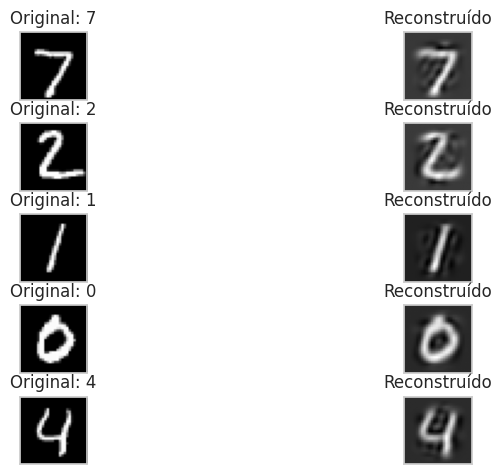

In [ ]:
# 4. Plottando gráfico
n_comparisons = 5

# Dimensões originais das imagens MNIST
mnist_h = 28
mnist_w = 28

# Criar nomes de classes para o MNIST (dígitos de 0 a 9)
mnist_target_names = [str(i) for i in range(10)]

test_titles = [mnist_target_names[y_test_mnist[i]] for i in range(n_comparisons)]
plot_reconstructions(X_test_mnist[:n_comparisons], X_test_mnist_reconstructed[:n_comparisons], test_titles, mnist_h, mnist_w)